In [1]:
import os
import tensorflow as tf
from tensorflow import keras
print(tf.version.VERSION)
new_model = tf.keras.models.load_model('/media/cmlws/Data2/jsp/LMEpredict/xrcs_t6vRe_norm/cnn_maeloss_hp30/0/30/model4.h5')

2022-03-21 14:29:54.194228: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


2.4.0


2022-03-21 14:29:55.755700: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-21 14:29:55.756578: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-21 14:29:55.794537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-03-21 14:29:55.794570: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-21 14:29:55.803227: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-21 14:29:55.803291: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022

In [2]:
new_model.summary()

Model: "model_149"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_150 (InputLayer)       [(None, 360, 180, 6)]     0         
_________________________________________________________________
conv2d_447 (Conv2D)          (None, 360, 180, 32)      4832      
_________________________________________________________________
max_pooling2d_298 (MaxPoolin (None, 180, 90, 32)       0         
_________________________________________________________________
conv2d_448 (Conv2D)          (None, 180, 90, 96)       27744     
_________________________________________________________________
max_pooling2d_299 (MaxPoolin (None, 90, 45, 96)        0         
_________________________________________________________________
conv2d_449 (Conv2D)          (None, 90, 45, 96)        230496    
_________________________________________________________________
flatten_149 (Flatten)        (None, 388800)            0 

In [3]:
new_model.layers

In [5]:
inputL.weights

[]

In [6]:
conv1 = new_model.layers[1]

In [7]:
conv1.weights

[<tf.Variable 'conv2d_447/kernel:0' shape=(5, 5, 6, 32) dtype=float32, numpy=
 array([[[[-0.05144808,  0.0118022 , -0.01101256, ...,  0.08116189,
            0.07168251, -0.03422707],
          [ 0.01763915,  0.08328108, -0.02079234, ...,  0.07081306,
            0.02884886, -0.02171723],
          [ 0.00825549,  0.04965303,  0.10223892, ..., -0.02430269,
            0.02923343,  0.03932587],
          [-0.04637225,  0.04604813, -0.02525038, ...,  0.02937397,
           -0.00428514,  0.02683956],
          [ 0.01821762,  0.01046322,  0.03937125, ...,  0.00971187,
           -0.09626714,  0.04858567],
          [-0.04795239, -0.00728307, -0.01567389, ...,  0.01503618,
           -0.01891543,  0.07756462]],
 
         [[-0.04698606,  0.09189624, -0.00787408, ...,  0.08651101,
            0.02818253, -0.04299337],
          [-0.00538211,  0.04028263, -0.05310007, ..., -0.01170026,
           -0.02650601, -0.06861681],
          [ 0.08372776, -0.05510418, -0.05426582, ...,  0.00609001,
   

In [8]:
len(conv1.weights)

2

In [9]:
conv1W = conv1.weights[0].numpy()

In [10]:
print(conv1W.mean(), conv1W.std())

-0.00025354172 0.044940963


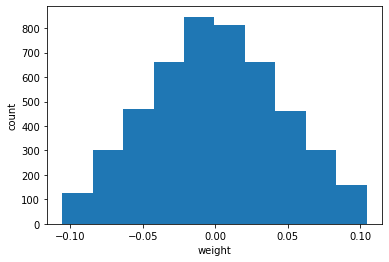

In [11]:
import matplotlib.pyplot as plt
plt.hist(conv1W.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [12]:
conv1W.shape

(5, 5, 6, 32)

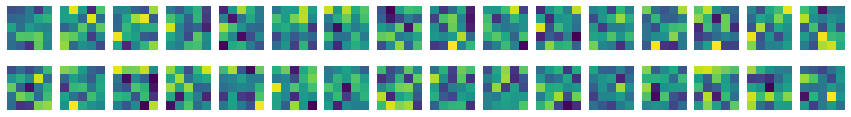

In [14]:
fig,axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv1W[:,:,0,i*16+j], vmin=-0.1, vmax=0.1)
        axs[i,j].axis('off')

plt.show()